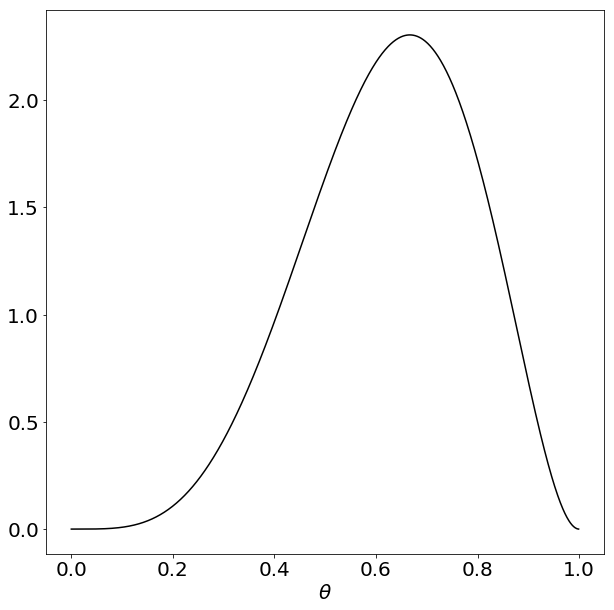

In [7]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

n = 5
y = 3
theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,n,y)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io.fits as fits

def loadData(filename):
    '''
    Read fits data
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl


N_star=28, N_gal=22

0.557692307692
N_star=33, N_gal=17

0.653846153846


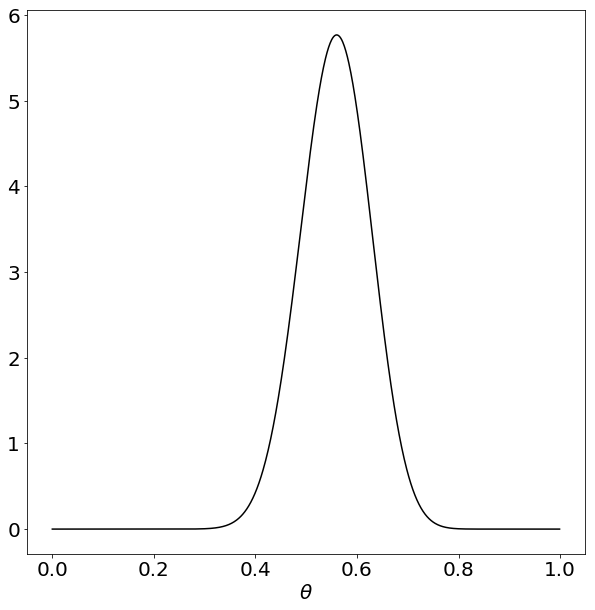

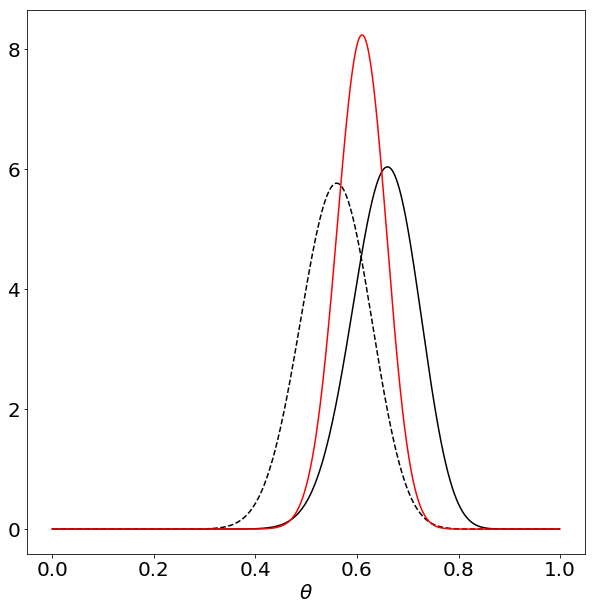

In [24]:
# star/galaxy ratio in a small field of sky
filename = 'sdss_field.fits'
sdss = loadData(filename)

#the first 50 data
types = sdss.type[0:50]
Nstar = np.sum(types==3)
N = 50
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)}
E_th_y = (Nstar+1.)/(N+2.)
print E_th_y

#with uniform distribution
theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,Nstar+1,N-Nstar+1)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

#with conjugate prior determined by the first 50 and use the 51:100 data
alpha = Nstar+1
beta = N-Nstar+1

types = sdss.type[50:100]
Nstar2 = np.sum(types==3)
N2 = 50
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)}
E_th_y = (Nstar2+1.)/(N2+2.)
print E_th_y
#uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--')
ax.plot(theta,p2_0,'k-')
ax.plot(theta,p2,'r-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

N_star=363, N_gal=187

0.659420289855


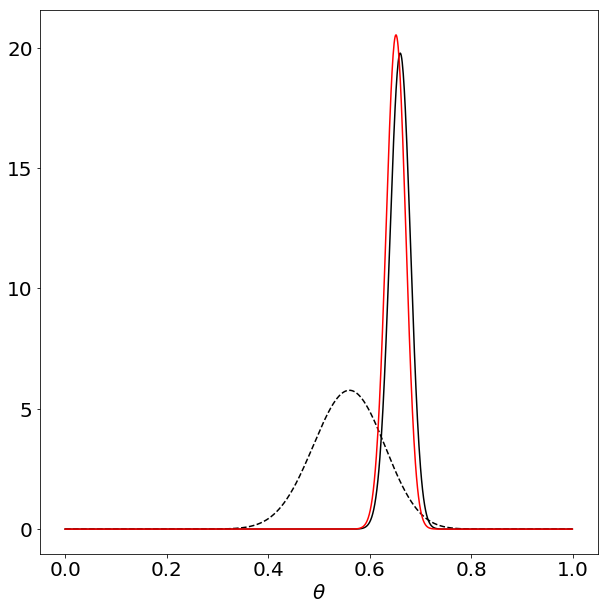

In [25]:
#when data increases prior play less role
alpha = Nstar+1
beta = N-Nstar+1

types = sdss.type[50:600]
Nstar2 = np.sum(types==3)
N2 = 550
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)}
E_th_y = (Nstar2+1.)/(N2+2.)
print E_th_y
#uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--')
ax.plot(theta,p2_0,'k-')
ax.plot(theta,p2,'r-')
ax.set_xlabel(r'$\theta$',fontsize=20)
fig.show()

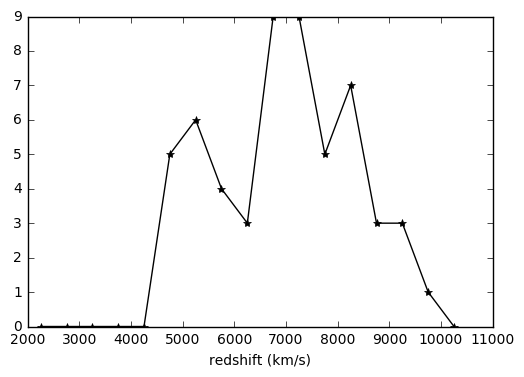

In [30]:
## the mean redshift of Coma cluster
filename = '/Users/cliu/pyw/Astrostatistics/ComaCluster.fits'
coma = loadData(filename)
cz = coma.czA[coma.czA<10000]

zgrid =np.arange(2000.,11000.,500.)
h, xedge = np.histogram(cz, bins=zgrid)
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax.plot(zgrid[0:-1]+250.,h,'k*-')
ax.set_xlabel('redshift (km/s)')
fig.show()

In [ ]:
# measure the redshift from an absorption line
